# <font color='red'>*Content based Recomandation system*</font>

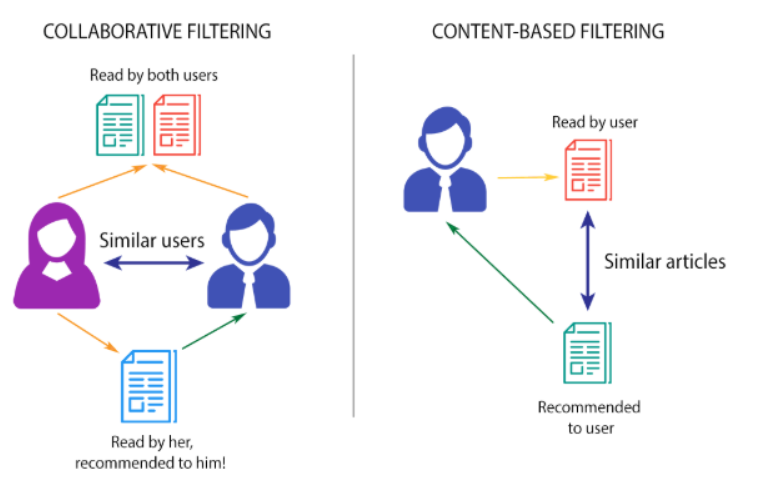

There are two types of recommandation system 
- Collaborative Filtering
- Content-based Filtering
<div>In collaborative recommandations is based on the users rating rather than the movie genre or description</div>
<div>In content-based it depends on the movie genre or decription of that particulare movie related to other movies</div>

In [7]:
#importing the libraries
import pandas as pd
import numpy as np
import ast


In [8]:
#loading Datasets
movies=pd.read_csv("movies.csv")
credits=pd.read_csv("credits.csv")

In [9]:
#top 3 rows of movies dataset
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [10]:
#top 3 rows of credits dataset
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


### <font color="blue">Main rows of movies Dataset</font>
- Genres      : type of the movies(Action,comedy,romance,adventure,etc,.)
- id          : Unique MovieId
- Language    : Language the movies is taken
- title       : Name of the movie
- Tagline     : Tagline for  the movie
- vote_average: Average rating for that movie
- overview    : short description for the movie

In [11]:
# shape of the datasets
print("Credits:",credits.shape)
print("Movies Dataframe:",movies.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [12]:
#renaming the column name movie_id in cretits to id for mergeing the two columns
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies.merge(credits_column_renamed, on='id')
movies_df_merge.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [13]:
print("Movies_merged_Dataframe:",movies_df_merge.shape)

Movies_merged_Dataframe: (4803, 23)


In [14]:
#removing the unwanted columns
movies_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


<Axes: >

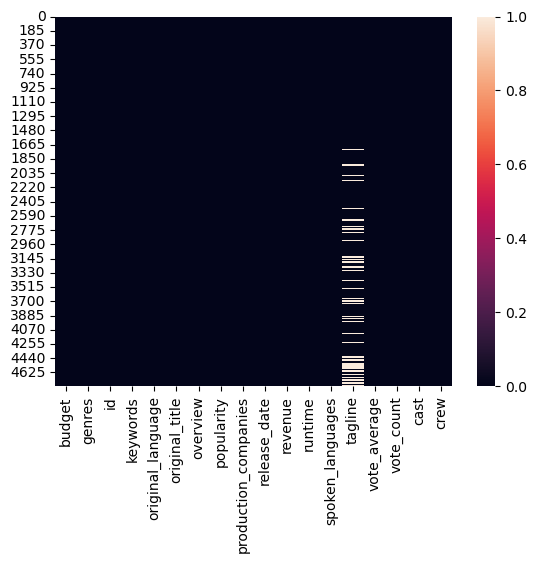

In [15]:
import seaborn as sns
sns.heatmap(movies_df.isnull())

 Taglines only contain missing values we are noting going to use it its not a problem

In [16]:
#overview column is used for content-based recommandation 
movies_df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [17]:
#term Frequency - Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',##remove , "" . '' in the sentences
            ngram_range=(1, 3), #gives unigram and trigram
            stop_words = 'english') ## remove stopwords

# Filling NaNs with empty string
movies_df['overview'] = movies_df['overview'].fillna('')

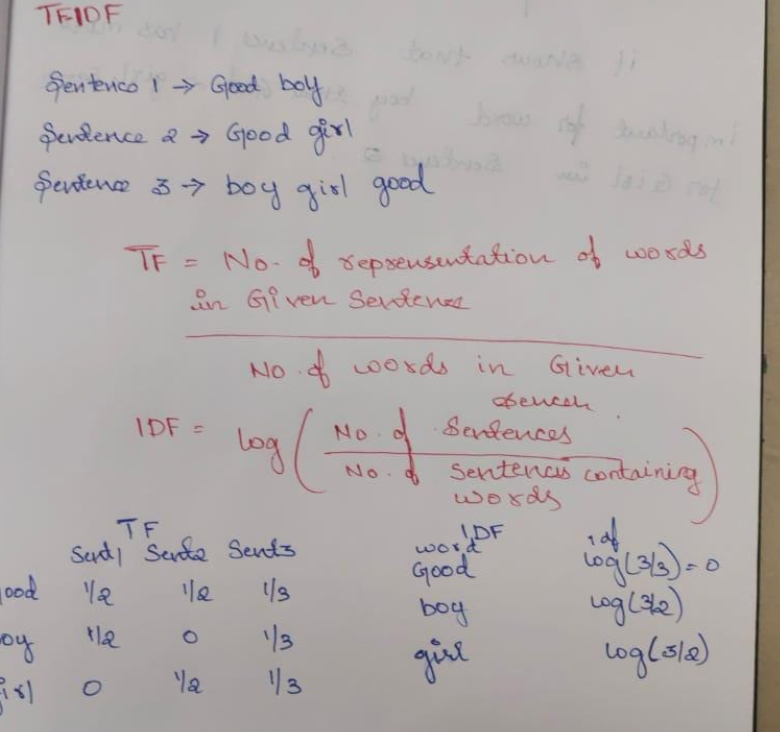

In [18]:
tfv_matrix = tfv.fit_transform(movies_df['overview'])
#it will give the matix output of tf*idf
#matrix with lot of values between 0 to 1
# it give vectors of values for each ovieview

tfv_matix example
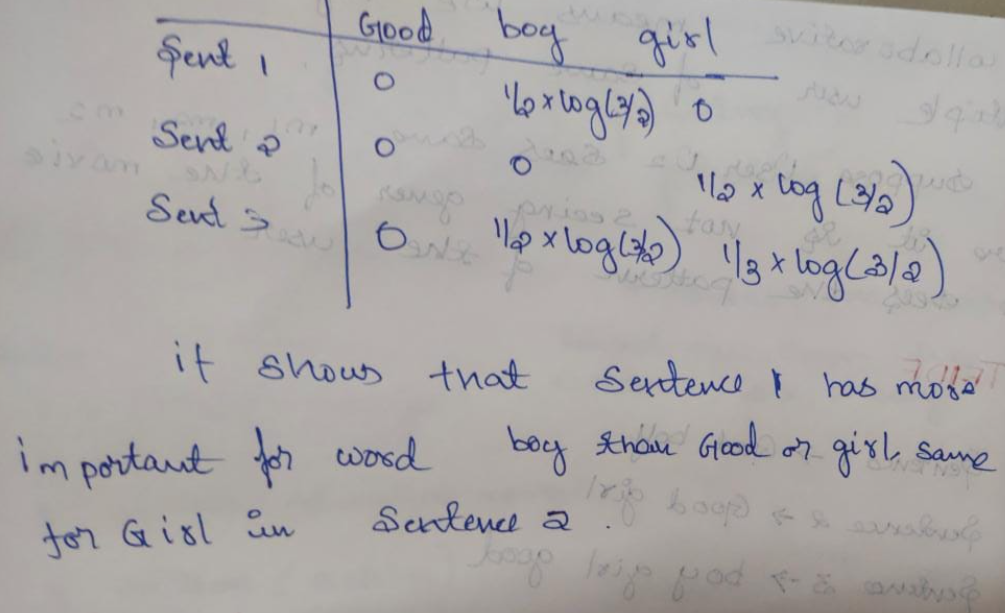

In [19]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
## it givens similarity for the different overviews of the movie
## values between 0 to 1

In [20]:
sig[0]
#Here lets say the it shows the similairty of the first movie overview to the all other overviews available 

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [21]:
#indices for each movie
indices = pd.Series(movies_df.index, index=movies_df['original_title']).drop_duplicates()

In [22]:
indices.index

Index(['Avatar', 'Pirates of the Caribbean: At World's End', 'Spectre',
       'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled',
       'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince',
       'Batman v Superman: Dawn of Justice',
       ...
       'On The Downlow', 'Sanctuary: Quite a Conundrum', 'Bang', 'Primer',
       'Cavite', 'El Mariachi', 'Newlyweds', 'Signed, Sealed, Delivered',
       'Shanghai Calling', 'My Date with Drew'],
      dtype='object', name='original_title', length=4803)

In [23]:
list(enumerate(sig[indices['Avatar']]))##enumerate gives index for each similarity

[(0, 0.7616344692549826),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.761595063615533),
 (4, 0.7615941559557649),
 (5, 0.7615952437887401),
 (6, 0.7615941559557649),
 (7, 0.7615957895326071),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615950265341388),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615956519417341),
 (27, 0.761596052213504),
 (28, 0.7615941559557649),
 (29, 0.76159517176877),
 (30, 0.7615941559557649),
 (31, 0.7615966149431749),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615978049286746),
 (37, 0.7615941

In [24]:
sorted(list(enumerate(sig[indices['Avatar']])), key=lambda x: x[1], reverse=True) ## sorteed on most simmilar value

[(0, 0.7616344692549826),
 (1341, 0.7616025920447053),
 (634, 0.7616024401965419),
 (3604, 0.7616014406892477),
 (2130, 0.7616011812503369),
 (775, 0.7616007762729179),
 (529, 0.7615992890001902),
 (151, 0.761598879941716),
 (311, 0.7615988278895982),
 (847, 0.7615985500328715),
 (942, 0.7615982329969357),
 (36, 0.7615978049286746),
 (570, 0.7615978022053305),
 (1610, 0.7615977966096297),
 (3070, 0.7615976645241046),
 (1784, 0.7615975383363387),
 (1033, 0.7615975196714474),
 (2578, 0.7615975094523114),
 (1013, 0.7615974265257723),
 (3724, 0.7615974179035275),
 (4211, 0.7615973869264397),
 (1213, 0.7615973745472654),
 (150, 0.7615973574871462),
 (4039, 0.7615972111762077),
 (2628, 0.761597193202003),
 (312, 0.761597191124526),
 (614, 0.7615971449141005),
 (281, 0.7615971056794063),
 (174, 0.7615970985055746),
 (1345, 0.7615970627704598),
 (3624, 0.761597037462512),
 (1274, 0.761597015214184),
 (1959, 0.761596994311261),
 (3970, 0.7615969681970558),
 (972, 0.7615969165740755),
 (2767, 0.

In [25]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_df['original_title'].iloc[movie_indices]

In [26]:
give_rec('Iron Man')

79                    Iron Man 2
31                    Iron Man 3
7        Avengers: Age of Ultron
538                      Hostage
1290    Baahubali: The Beginning
Name: original_title, dtype: object

<div class="alert alert-info">These are the content based recomandation for movie name Iron Man</div>

*** ***
*** ***

### Modifing for frontend purpose

In [27]:

movies_df=movies_df[['id','original_language','original_title','release_date','genres','vote_count']]

In [28]:
movies_df.head(3)

,id,original_language,original_title,release_date,genres,vote_count
0,19995,en,Avatar,2009-12-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",11800
1,285,en,Pirates of the Caribbean: At World's End,2007-05-19,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",4500
2,206647,en,Spectre,2015-10-26,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",4466


In [29]:
type(sig)

numpy.ndarray

In [30]:
## convering genres into list of items
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 
movies_df['genres'] = movies_df['genres'].apply(convert)
movies_df.head()

,id,original_language,original_title,release_date,genres,vote_count
0,19995,en,Avatar,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]",11800
1,285,en,Pirates of the Caribbean: At World's End,2007-05-19,"[Adventure, Fantasy, Action]",4500
2,206647,en,Spectre,2015-10-26,"[Action, Adventure, Crime]",4466
3,49026,en,The Dark Knight Rises,2012-07-16,"[Action, Crime, Drama, Thriller]",9106
4,49529,en,John Carter,2012-03-07,"[Action, Adventure, Science Fiction]",2124


In [31]:
## short forms of language available
movies_df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [32]:
#tamil
movies_df[movies_df['original_language']=='ta']

,id,original_language,original_title,release_date,genres,vote_count
2271,280871,ta,ராமானுஜன்,2014-07-11,"[Drama, History]",3
4179,260778,ta,வாலு,2015-08-14,"[Comedy, Romance]",5


In [33]:
movies_df[movies_df['original_title']=='வாலு']

,id,original_language,original_title,release_date,genres,vote_count
4179,260778,ta,வாலு,2015-08-14,"[Comedy, Romance]",5


In [34]:
language_mapping = {
    'en': 'English',
    'ja': 'Japanese',
    'fr': 'French',
    'zh': 'Chinese',
    'es': 'Spanish',
    'de': 'German',
    'hi': 'Hindi',
    'ru': 'Russian',
    'ko': 'Korean',
    'te': 'Telugu',
    'cn': 'Chinese',  # Note: Using 'zh' for Chinese, 'cn' is not a standard code
    'it': 'Italian',
    'nl': 'Dutch',
    'ta': 'Tamil',
    'sv': 'Swedish',
    'th': 'Thai',
    'da': 'Danish',
    'xx': 'Placeholder',
    'hu': 'Hungarian',
    'cs': 'Czech',
    'pt': 'Portuguese',
    'is': 'Icelandic',
    'tr': 'Turkish',
    'nb': 'Norwegian Bokmål',
    'af': 'Afrikaans',
    'pl': 'Polish',
    'he': 'Hebrew',
    'ar': 'Arabic',
    'vi': 'Vietnamese',
    'ky': 'Kyrgyz',
    'id': 'Indonesian',
    'ro': 'Romanian',
    'fa': 'Persian',
    'no': 'Norwegian',
    'sl': 'Slovenian',
    'ps': 'Pashto',
    'el': 'Greek'
}

In [35]:
def lan_fullform(text):
    return language_mapping.get(text)
    

In [36]:
movies_df['language']=movies_df['original_language'].apply(lan_fullform)

In [37]:
movies_df.head(3)

,id,original_language,original_title,release_date,genres,vote_count,language
0,19995,en,Avatar,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]",11800,English
1,285,en,Pirates of the Caribbean: At World's End,2007-05-19,"[Adventure, Fantasy, Action]",4500,English
2,206647,en,Spectre,2015-10-26,"[Action, Adventure, Crime]",4466,English


In [38]:
movies_df.drop('original_language',axis=1,inplace=True)
movies_df.head(3)

,id,original_title,release_date,genres,vote_count,language
0,19995,Avatar,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]",11800,English
1,285,Pirates of the Caribbean: At World's End,2007-05-19,"[Adventure, Fantasy, Action]",4500,English
2,206647,Spectre,2015-10-26,"[Action, Adventure, Crime]",4466,English


In [39]:
np.save('sig.npy',sig)


In [40]:
movies_df.to_csv('finalmovies.csv')

In [41]:
type(indices)

pandas.core.series.Series

In [42]:
pickle_file_path = "indices.pkl"

# Save the Series to a pickle file
indices.to_pickle(pickle_file_path)


In [43]:
type(sig)

numpy.ndarray

In [44]:
import os

In [45]:
# # Define a file name for the zip archive
# zip_file_name = 'sig.zip'
# import zipfile

# # Create a zip file and add the NumPy array as a file within the archive
# with zipfile.ZipFile(zip_file_name, 'w') as zipf:
#     # Save the NumPy array to a temporary file
#     temp_file_name = 'temp.npy'
#     np.save(temp_file_name, sig)
    
#     # Add the temporary file to the zip archive
#     zipf.write(temp_file_name)

# # Clean up the temporary file
# import os
# os.remove(temp_file_name)

# print(f'NumPy array saved as {zip_file_name}')

## Cannot push sig file size 185 mb to git so dividing into 10 differnt files

In [46]:
newarr= np.array_split(sig, 10)

In [ ]:
x=1
for i in newarr:
    filename = f'smaller_array_{x}.npy'
    np.save(filename,i)
    print(f'Saved {filename}')
    x=x+1

In [48]:
a=np.load("smaller_array_1.npy")
b=np.load("smaller_array_2.npy")
c=np.load("smaller_array_3.npy")
d=np.load("smaller_array_4.npy")
e=np.load("smaller_array_5.npy")
f=np.load("smaller_array_6.npy")
g=np.load("smaller_array_7.npy")
h=np.load("smaller_array_8.npy")
i=np.load("smaller_array_9.npy")
j=np.load("smaller_array_10.npy")

In [49]:
combined_array = np.vstack((a,b,c,d,e,f,g,h,i,j))


In [50]:
type(combined_array)

numpy.ndarray

In [51]:
def give(title, sig=combined_array):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_df['original_title'].iloc[movie_indices]

In [52]:
give('Iron Man')

79                    Iron Man 2
31                    Iron Man 3
7        Avengers: Age of Ultron
538                      Hostage
1290    Baahubali: The Beginning
Name: original_title, dtype: object